<img align="left" src="../images/Guyman-Helmet-On-icon.png">

# L-Met

## Exemple d'utilisation : Classe _gratingFresnel_

Définition d'un motif monocouche et lancement d'un calcul

---

In [1]:
# If LMet is not in your PYTHONPATH
import sys
sys.path.append('../')

In [2]:
%matplotlib inline
from pylab import  *
from math import radians
import numpy as np

from LMet.gratingFresnel import *

%load_ext autoreload
%autoreload 2

### Détermination des données du réseau et du calcul

- les paramètres à utiliser (grandeurs, matériaux, etc)
- le contexte du calcul

In [4]:
air = material('constant', 1+0j, 'Air')
sub = material('file', "../data/IF_{Si100}.txt", 'Silicium')
ox = material('file', "../data/IF_{SiO2_TEOS}.txt", 'Oxyde')

p = {"ec": 30.0,
     "mat" : [air, ox, sub]}

context = {"Hv" : linspace(300, 500.0, 20),
           "angle" : np.array([radians(70)])}


### Création de l'objet $grating$ et lancement du calcul

In [5]:
g = gratingFresnel()

g.parameters = p
g.context = context

g.build()
g.display()

s = g.signature(context)
s.data.head(5)

ec :  30.0


,angle,Hv,rp,rs,Psi,Delta,Is,Ic,S1,S2
0,1.22173,300.000000,0.050600,0.812444,0.683230,1.508595,0.977302,0.060868,0.202917,0.060868
1,1.22173,310.526316,0.040967,0.777725,0.661682,1.518170,0.968202,0.051000,0.244915,0.051000
2,1.22173,321.052632,0.027189,0.753545,0.646079,1.534731,0.960806,0.034667,0.275047,0.034667
3,1.22173,331.578947,0.010088,0.734040,0.633253,1.557054,0.953970,0.013111,0.299616,0.013111
4,1.22173,342.105263,-0.009835,0.718268,0.622926,1.584488,0.947580,-0.012975,0.319256,-0.012975


## Affichage du créneau



In [6]:
g.showSVG()

## Optimisation - problème inverse

Prenons une signature et ajoutons lui un bruit gaussien.

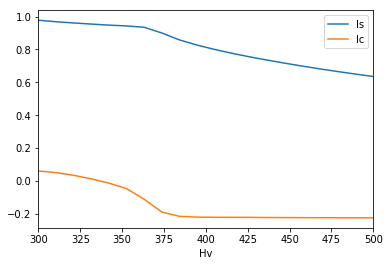

In [7]:
sig = s
sig.isic
sig.data.head(5)
sig.data.plot(x='Hv', y=['Is', 'Ic'])

Le type de bruit provient de *numpy.random*. Il y a d'autre distributions possibles :

http://docs.scipy.org/doc/numpy/reference/routines.random.html

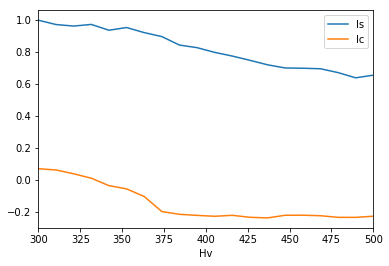

In [8]:
ec = 0.01
sig.data.Is = sig.data.Is + np.random.normal(0, ec, len(sig.data))
sig.data.Ic = sig.data.Ic + np.random.normal(0, ec, len(sig.data))

sig.data.plot(x='Hv', y=['Is', 'Ic'])

Lancement effectif du problème inverse.

L'optimization vient de *scipy* :

http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

Mais il semble que *jac=False* ne marche pas pour Newton-CG par exemple : comprendre pourquoi.


In [9]:
# Si h n'étais pas lié à cd :
# g.ip(sig, ("cd", "h"),  (300,300), method = "Powell") # params à otimiser, methode, initial guess
         
g.ip(sig, ("ec",),  (30,), method = "Powell") # params à otimiser, methode, initial guess
           

   direc: array([[1.]])
     fun: 0.06311123510828034
 message: 'Optimization terminated successfully.'
    nfev: 23
     nit: 2
  status: 0
 success: True
       x: array(29.79395176)